# **Boston Housing Price**

### Objective: To predict the median value of the house given 13 features in the dataset

*Data obtained from: https://www.kaggle.com/c/boston-housing/data*


### 1. Import the necessary libraries

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.imports import *
from fastai.structured import *

from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor
from IPython.display import display


from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV

C:\Users\santo\Anaconda3\envs\fastai\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


### 2. Loading the Dataset

In [3]:
PATH = 'data/Boston Housing Dataset/'

In [4]:
df_raw_train = pd.read_csv(f'{PATH}train.csv',low_memory = False)
df_raw_test = pd.read_csv(f'{PATH}test.csv',low_memory = False)


#### We write a function to display all the columns in our dataset

In [5]:
def display_all(df):
    with pd.option_context("display.max_rows",1000):
        with pd.option_context("display.max_columns",1000):
            display(df)

In [6]:
display_all(df_raw_train)

,ID,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,1,7.52601,0.0,18.10,0,0.7130,6.417,98.3,2.1850,24,666,20.2,304.21,19.31,13.0
1,2,0.01360,75.0,4.00,0,0.4100,5.888,47.6,7.3197,3,469,21.1,396.90,14.80,18.9
2,3,0.05789,12.5,6.07,0,0.4090,5.878,21.4,6.4980,4,345,18.9,396.21,8.10,22.0
3,4,0.05646,0.0,12.83,0,0.4370,6.232,53.7,5.0141,5,398,18.7,386.40,12.34,21.2
4,5,2.14918,0.0,19.58,0,0.8710,5.709,98.5,1.6232,5,403,14.7,261.95,15.79,19.4
5,6,0.22876,0.0,8.56,0,0.5200,6.405,85.4,2.7147,5,384,20.9,70.80,10.63,18.6
6,7,0.00906,90.0,2.97,0,0.4000,7.088,20.8,7.3073,1,285,15.3,394.72,7.85,32.2
7,8,0.03961,0.0,5.19,0,0.5150,6.037,34.5,5.9853,5,224,20.2,396.90,8.01,21.1
8,9,0.53412,20.0,3.97,0,0.6470,7.520,89.4,2.1398,5,264,13.0,388.37,7.26,43.1
9,10,0.08873,21.0,5.64,0,0.4390,5.963,45.7,6.8147,4,243,16.8,395.56,13.45,19.7


### 3. Understanding the raw data better

#### 3.1 From the raw training dataset, we observe that there are *13 independent variables (i.e. Features)*:

*1. ID: Row ID of each row in the dataset.*

*2. CRIM: The crime rate per capita by town.*

*3. ZN: Proportion of residential land zoned for lots over 25,000ft (i.e. how much residential land that was set aside per 25,000ft).*

*4.INDUS: Proportion of non-retail business acres per town.*

*5.CHAS Charles River dummy variable (where = 1 if tract bounds river; 0 otherwise).*

*6.NOX: Nitrogen Oxide Concentration (parts per 10 million).*

*7.RM: Average number of rooms per dwelling.*

*8. Age: Proportion of owner-occupied units built prior to 1940.*

*9. DIS: Weighted mean of distances to five Boston employment centres.*

*10. RAD: Index of accessibility to radial highways.*

*11. TAX: Full-value property-tax rate per 10,000 dollars.*

*12. PTRATION: Pupil-teacher ratio by town.*

*13. B: Proportion of blacks by town.*

*14. LSTAT: Lower status of the population (percent).*


### 4. Data Preprocessing

In [7]:
df_raw_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       406 non-null    int64  
 1   CRIM     406 non-null    float64
 2   ZN       406 non-null    float64
 3   INDUS    406 non-null    float64
 4   CHAS     406 non-null    int64  
 5   NOX      406 non-null    float64
 6   RM       406 non-null    float64
 7   AGE      406 non-null    float64
 8   DIS      406 non-null    float64
 9   RAD      406 non-null    int64  
 10  TAX      406 non-null    int64  
 11  PTRATIO  406 non-null    float64
 12  B        406 non-null    float64
 13  LSTAT    406 non-null    float64
 14  MEDV     406 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 47.7 KB


Observation 1: All of our features data types are either integers of floats. There are no categories in the dataset.

Observation 2: There are no missing values in our dataset.

### 5. Exploratory Data Analysis

#### 5.1 We will first try to determine the distribution of the dependent variable (MDEV)

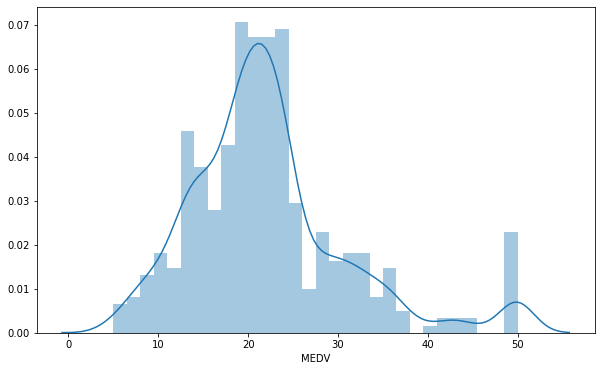

In [8]:
plt.figure(figsize=(10, 6))
sns.distplot(df_raw_train['MEDV'],bins=30)

We can see that the values of MEDV are following a normal distribution with a mean of around 22. There are some outliers to the right.

#### 5.2 Next, we will try to determine if there are any correlations between: 
##### (i) the independent variables themselves 
##### (ii) the independent variables and dependent variable

#### To do this, we are going to do a correlation heatmap.

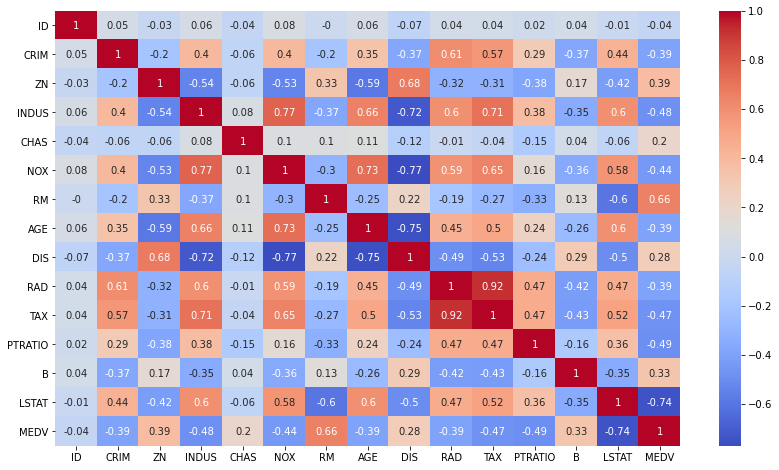

In [9]:
plt.figure(figsize=(14, 8))
corr_matrix = df_raw_train.corr().round(2)
sns.heatmap(data=corr_matrix,cmap='coolwarm',annot=True)

(i) We would need to look out for features of multi-collinearity (i.e. features that are correlated with each other)as this will affect our relationship with the independent variable. We will discuss this later.

We observe the following features are correlated (i.e. correaltion score greater than 0.70):

    a. INDUS and Tax are quite highly correlated (Corr_score: 0.71).

    b. NOX and INDUS are quite highly correlated (Corr score: 0.77). NOX is quite highly correlated with AGE (Corr score: 0.73). NOX is quite highly correlated with DIS ( Corr score: -0.77).
    
    c. AGE is quite highly correlated with DIS (Corr score: -0.75).
    
    d. DIS is quite highly correlated with INDUS (Corr score: -0.72).
        
    e. RAD is highly correlated with TAX (Corr score: 0.92)
    
(ii) In order for our regression model to perform well, we ideally need to select those features that are highly correlated with our dependent variable (MEDV).

    a. MEDV is quite highly correlated with RM (Corr_score: 0.66)
    
    b. MEDV is quite highly correlated with LSTAT (Corr_score: -0.74).

We will do a scatter plot to observe the correlations between the features that are highly correlated with MDEV to observe the relationship.

Text(0, 0.5, 'MEDV')

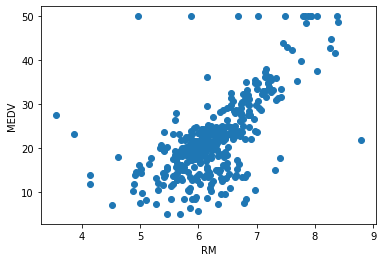

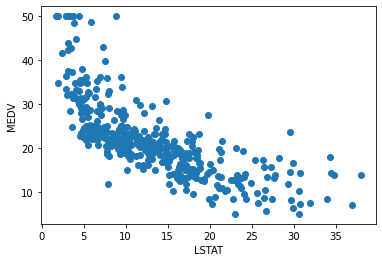

In [10]:
target_var = df_raw_train['MEDV']

plot1 = plt.figure(1)
plt.scatter(df_raw_train['RM'],target_var)
plt.xlabel('RM')
plt.ylabel('MEDV')

plot2 = plt.figure(2)
plt.scatter(df_raw_train['LSTAT'],target_var)
plt.xlabel('LSTAT')
plt.ylabel('MEDV')

From the scatter plot above, we observe the following:
   
   i. MEDV increases linearly with the RM. This makes sense as we would expect that the median price of a house in boston would be more generally more expensive as the number of rooms increases. 

   ii. MEDV decreases linearly with LSTAT. This also makes sense since we can expect that the median price of a house in boston would generally be less expensive at places of lower status. 

### 6. Using Machine Learning Models for prediction of the median housing price

#### 6.1 Evaluation Metric

It is important to choose the right evaluation metric that will help us to evaluate whether our model's performance is good. For regression problems, we usually would choose the evaluation metric to be either **Root Mean Square Error(RMSE)** or **Root Mean Square Logistic Error (RMSLE)**.

**RMSE**: It is a measure of the squared difference difference between the prediction from our model and the actual value.

$$RMSE(y) = \sqrt{\sum\limits_{i=1}^{n} {(y'-y)^2}}$$ 
*where y': predicted value, y: actual value*

**RMSLE**: It is a measure of the squared difference between the log of the prediction from our model and the log of the actual value. 

$$RMLSE(y) = \sqrt{\sum\limits_{i=1}^{n} {(\log(y'+1)-\log(y+1))^2}}$$ *where y': predicted value, y: actual value*

The evaluation metric chosen for this project is RMSE. 

**note:** However, for the purpose of discussion, the RMSLE might be a better evaluation metric as (1) it is robust enough to deal with outliers, which we saw is present in our data set (please refer to the distribution plot in 5.1) (2) RMSLE incurs a larger penalty for underestimation of the actual value. For this case, we do not want to underestimate the price as it would result in losses that can be detrimental to both the seller and the agent although it would be beneficial to the buyer.

#### 6.2 Using Random Forest Regressor Model

The machine learning model we would choose will be the Random Forest Regressor Model and here is why:

1. Random Forests models **require minimal data preparation**. It is able to easily hand categorical, numerical and binary features without scaling or normalization required.


2. Random Forests models can help us in performing implicit feature selections as they provide **good indicators of the important features**.


3. Random Forest models are **immune to outliers**, which is present in our data, and they **completely ignore statistical issues** because unlike other machine learning models which perform much better after being normalized.

#### 6.2.1 Before we start with training any of the model, we would like to create the following functions:

(i) A function to split our training data into a training set to train our model and a validations set, which will be used to validate our model.

In [11]:
def split_vals(a,n):
    return a[:n],a[n:]

(ii) A function that will help us calculate the RMSE and print the score 

In [12]:
def rmse(x,y):
    return math.sqrt(((x-y)**2).mean())

def print_score(m):
    res =[rmse(m.predict(X_train),y_train),rmse(m.predict(X_valid),y_valid),m.score(X_train,y_train),m.score(X_valid,y_valid)]
    if hasattr(m,'oob_score_'):res.append(m.oob_score_)
    print(res)


#### 6.2.2 We would to split our training data further (training set to train our model on and a validation set to validate the performance of our model).

In [13]:
n_valid = 100
n_train = len(df_raw_train)-n_valid
X_train,X_valid = split_vals(df_raw_train.drop('MEDV',axis=1),n_train)
y_train,y_valid = split_vals(df_raw_train['MEDV'],n_train)
X_test = df_raw_test

#### 6.2.3 Random Forest without feature selection and hyperparameter tuning.

We will start by training a Random Forest Model without tuning any hyperparameters. This will be used as the base model for our discussion later on feature importance later.

In [14]:
m = RandomForestRegressor(n_jobs=-1,oob_score=True)
m.fit(X_train,y_train)
print_score(m)

[1.3946434360529185, 3.0218688588355374, 0.9765849452413979, 0.8547978744183689, 0.8342340188939908]


From our base Random Forest Mode, we observe that the RMSE_train = 1.345, RMSE_valid = 3.1149, R^2_train = 0.9782, R^2 = 0.84571.

We can see that it seems to be overfitting since the RMSE_valid around 3 times higher than the RMSE_train.

#### 6.2.4 Feature Engineering - Feature Importance

We will know try to further fine tune our Random Forest model by determining which of the features were deemed to be important in our base Random Forest model.


In [15]:
def feat_importance(m,df_train):
    importance = m.feature_importances_
    importance = pd.DataFrame(importance,index=df_train.columns,columns=["Importance"])
    return importance.sort_values(by=['Importance'],ascending=False)

In [16]:
importance = feat_importance(m,X_train)
importance[:]

,Importance
LSTAT,0.587072
RM,0.212774
DIS,0.047266
CRIM,0.039221
TAX,0.025601
NOX,0.020579
PTRATIO,0.019630
AGE,0.012799
B,0.009339
INDUS,0.008916


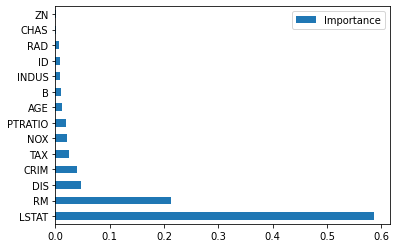

In [17]:
importance.plot(kind='barh')

We observe that the **most importance features** in predicting the MDEV are **LSTAT** and **RM**. Recall that these two parameters were previously found to be highly correlated with the MDEV.

The next step will be to try and discard features with importance coefficient less than 0.01 and use it to model our Random Forest again to see if there is an improvement in our prediction results.

In [18]:
importance['Importance']

LSTAT      0.587072
RM         0.212774
DIS        0.047266
CRIM       0.039221
TAX        0.025601
NOX        0.020579
PTRATIO    0.019630
AGE        0.012799
B          0.009339
INDUS      0.008916
ID         0.007798
RAD        0.006564
CHAS       0.001484
ZN         0.000955
Name: Importance, dtype: float64

In [44]:
to_keep = importance[importance['Importance'] > 0.01].index
df_raw_train_keep = df_raw_train[to_keep].copy()
df_raw_test_keep = df_raw_test[to_keep].copy()

In [45]:
X_train,X_valid = split_vals(df_raw_train_keep,n_train)

In [46]:
m = RandomForestRegressor(n_jobs=-1,oob_score=True)
m.fit(X_train,y_train)
print_score(m)

[1.3063895777133907, 3.0204825707161422, 0.9794546181461289, 0.854931067365823, 0.8472225233291628]


We observe that our base Random Forest model performs slighly better after we have removed redundant features. 

We also see that there are only 10 features which are important in determining the MDEV:
    1. LSTAT
    2. RM
    3. DIS
    4. CRIM
    5. TAX
    6. NOX
    7. PTRATIO
    8. NOX
    9. AGE
    10. B

One of the outcomes we would like to achieve is to remove the multicollinearity between the features. To do this, we will plot a dendogram.

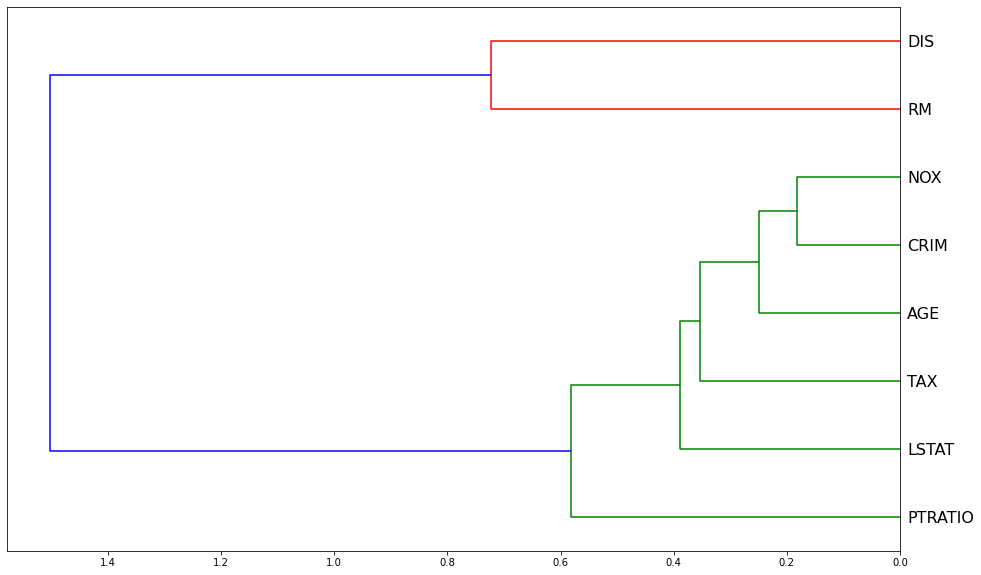

In [22]:
from scipy.cluster import hierarchy as hc
corr = np.round(scipy.stats.spearmanr(df_raw_train_keep).correlation,4)
corr_condensed = hc.distance.squareform(1-corr)
z = hc.linkage(corr_condensed,method='average')
fig = plt.figure(figsize=(16,10))
dendogram = hc.dendrogram(z,labels=df_raw_train_keep.columns,orientation='left',leaf_font_size=16)
plt.show()

From the dendogram plot, we observe that NOX , CRIM and AGE are basically some what measuring the same thing, in terms of ranking but they are not very close. If they were very close the next step would be to try removing these related features, one at a time, and see if the model can be simplified without impacting the accuracy. However for this case, we will skip this step since they are not very close in terms of ranking.

#### Feature Engineering - Feature Importance (Continuation...)


If we look at the feature importance of our Random Forest Model, we observe that the most important features after removing the redundant features previously are still LSTAT and RM. In this section, would like to explore how dropping each of the remaining features one by one would affect our overall score.

In [47]:
def feat_importance(m,df_raw_train_keep):
    importance = m.feature_importances_
    importance = pd.DataFrame(importance,index=df_train.columns,columns=["Importance"])
    return importance.sort_values(by=['Importance'],ascending=False)

In [48]:
importance

,Importance
LSTAT,0.400693
RM,0.272831
NOX,0.080857
CRIM,0.073526
DIS,0.072469
PTRATIO,0.064878
AGE,0.034745


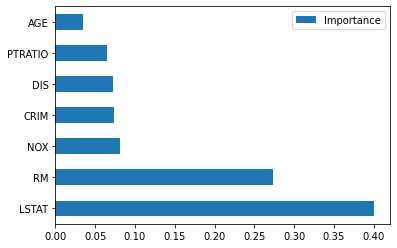

In [49]:
importance.plot(kind='barh')

In [52]:
feats = ['LSTAT','RM','DIS','NOX','PTRATIO','CRIM','AGE']
m = RandomForestRegressor(n_jobs=-1,oob_score=True)
m.fit(X_train,y_train)
print_score(m)

[1.4185045471646536, 3.1188934287660417, 0.9757768695453068, 0.8453240406556793, 0.8285318036503034]


In [53]:
for f in feats:
    df_subs = df_raw_train_keep.drop(f,axis=1)
    X_train,X_valid =split_vals(df_subs,n_train)
    m = RandomForestRegressor(n_jobs=-1,oob_score=True)
    m.fit(X_train,y_train)
    print(f)
    print_score(m)
    

LSTAT
[1.8056239104205367, 3.3278751253615253, 0.9607514697982958, 0.8239014456718035, 0.6908574729986297]
RM
[1.5675250954407727, 3.952312881086211, 0.9704200246092192, 0.7516155616462369, 0.7875551279800503]
DIS
[1.4621917216011568, 3.2395115943610993, 0.9742618430421569, 0.8331290167664831, 0.8269028689415385]
NOX
[1.5008497092224788, 3.2441961731683233, 0.9728829017705362, 0.8326460516884883, 0.8219839866244096]
PTRATIO
[1.4379716151625086, 3.0952967192177225, 0.9751074475876751, 0.8476556604442624, 0.8161589049421294]
CRIM
[1.4274427520771256, 3.1864395679190265, 0.9754706407936581, 0.8385518323912685, 0.8288521212609287]
AGE
[1.3739555938443608, 3.0659043445613237, 0.9772744607851648, 0.8505351917480173, 0.8261463201965449]


Removing LSTAT, RM, DIS and TAX results in a worst RSME_validation and R^2 validation while removing DIS and PTRATIO gives us a slightly better score. Hence, we will remove DIS and PTRATIO from the data set before doing our final model.

#### 6.2.5 Random Forest with hyperparameter tuning

We will now start to do hyperparameter tuning after feature selection.

1. *n_estimators*: Number of trees to create and generalize over our Random Forest. Likely, the more trees we create, the better as it would enable us to sample more of the dataset and help us to generalize better. However, there would come a point whereby increasing the number of trees will only result in very small changes to our RMSE_validation at the cost of compuational power.


2. *min_samples_leaf*: This indicates the number of samples that will be in our leaf node. Each time we double the min_sample_leaf, we are removing one layer from the tree and halving the number of leaf nodes. Hence, the result of increasing min_samples_leaf is that each of our leaf nodes will have more than one sample inside them so when we calculate the average on that leaf node, it would be more stable although we will get a little less depth and have smaller number of nodes.Hence, though each tree will not be less predictive and less correlated, our model should be able to generalize better and prevetn overfitting.


3. *max_features*: This indicates how many of the features to consider  at each split.


To optimize and search for the best hyperparameters, we will be using **Randomized Grid Search**.

In [26]:
n_estimators = [int(x) for x in np.arange(start = 10, stop = 2000, step = 10)]
max_features = [0.5,'auto', 'sqrt','log2']
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [27]:
# First create the base model to tune
m = RandomForestRegressor()
# Fit the random search model
m_random = RandomizedSearchCV(estimator = m, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
m_random.fit(X_train, y_train)
m_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done 150 tasks      | elapsed:   27.6s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   53.5s finished


{'n_estimators': 640,
 'min_samples_leaf': 1,
 'max_features': 0.5,
 'bootstrap': False}

From our Randomized Grid Search, we found that the most optimized hyperparameters for our Random Forest are:
1. n_esimators: 470
2. min_samples_leaf: 1
3. max_features: 'sqrt'
4. bootstrap: True

We will fit our Random Forest model with these hyperparameters again and see the results.

In [28]:
m = RandomForestRegressor(n_estimators=640,min_samples_leaf=1,max_features=0.5,n_jobs=-1,bootstrap=True,oob_score = True)
m.fit(X_train,y_train)
print_score(m)

[1.2931239200736848, 2.919365372122407, 0.9798697534471021, 0.8644814792985941, 0.851540106959263]


We observe that our Random Forest model with optimzed hyperparameters performs better than the base model and we have a model which is smaller and simpler with a better R^2 validation score.

#### 6.2.6 Partial Independence


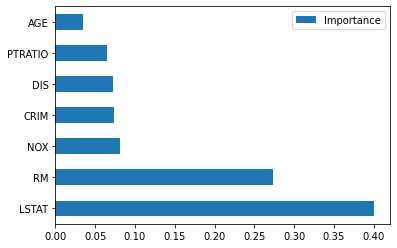

In [29]:
importance = feat_importance(m,X_train)
importance.plot(kind='barh')

From the feature importance plot, we can see that after removing features, the feature RM importance went up. We will try exploring this further later.

For now, we will try to plot RM with the MDEV to see how they are related.

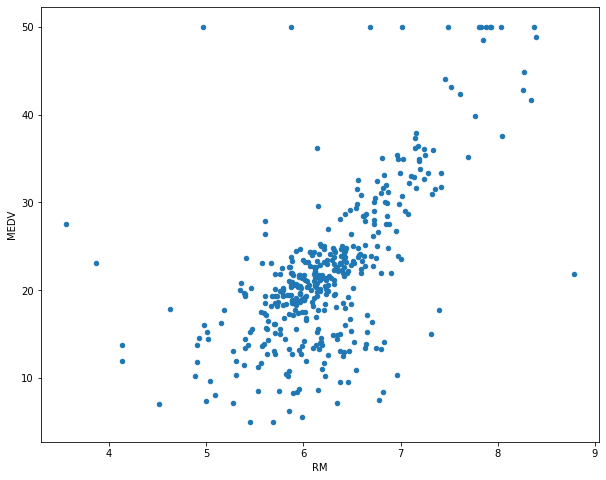

In [30]:
df_raw_train.plot('RM','MEDV','scatter',figsize=(10,8))

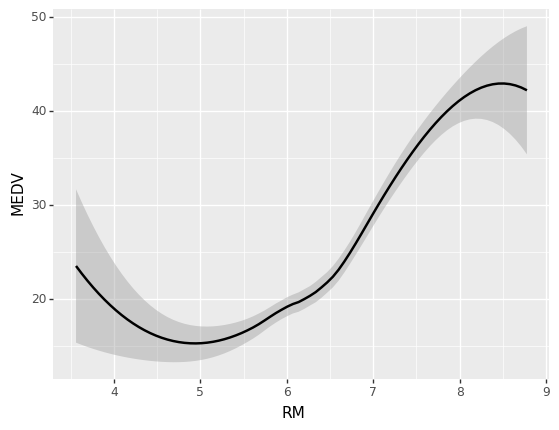

<ggplot: (-9223371944088702839)>

In [31]:
from pdpbox import pdp
from plotnine import *
ggplot(df_raw_train, aes('RM', 'MEDV'))+stat_smooth(se=True, method='loess')

Based on the grammer of graphics plot above, we observe that the relationship between the RM and MEDV is not what we are expecting. For instance, one would generally expect the price of the house to increase with the number of rooms. However, we see in a drop in price between 4 rooms and 5 rooms, likewise a price drop between 8 rooms to 9 rooms. 

The issue here is that when we are looking at univariate relationships, there are collinearity that is going on and there are a lot of interactions between the features that are being lost in univariate plots. For instance, why did the price drop for houses that are 5 rooms as compared to 4 rooms. 

Hence, to find the true relationship between RM and MEDV, we would need to do a partial independence plot (ie assuming that all other features being equal, how does the price of the house vary with the number of rooms).

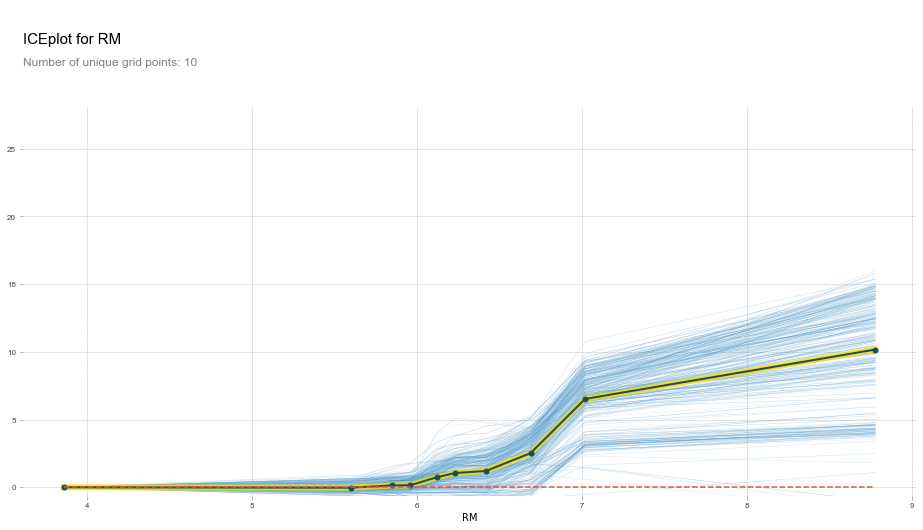

In [32]:
def plot_pdp(feat,clusters=None,feat_name=None):
    feat_name = feat_name or feat
    p = pdp.pdp_isolate(m,X_train,feat)
    return pdp.pdp_plot(p,feat_name,plot_lines=True,cluster=clusters is not None,n_cluster_centers = clusters)
plot_pdp('RM')

Notice from the Partial Dependence Plot (PDP) above, after removing all other externaties we observe that the relationship between the RM and MEDV is almost a straight line (i.e. roughly linear). The yellow line represents the average MEDV of all the transactions.

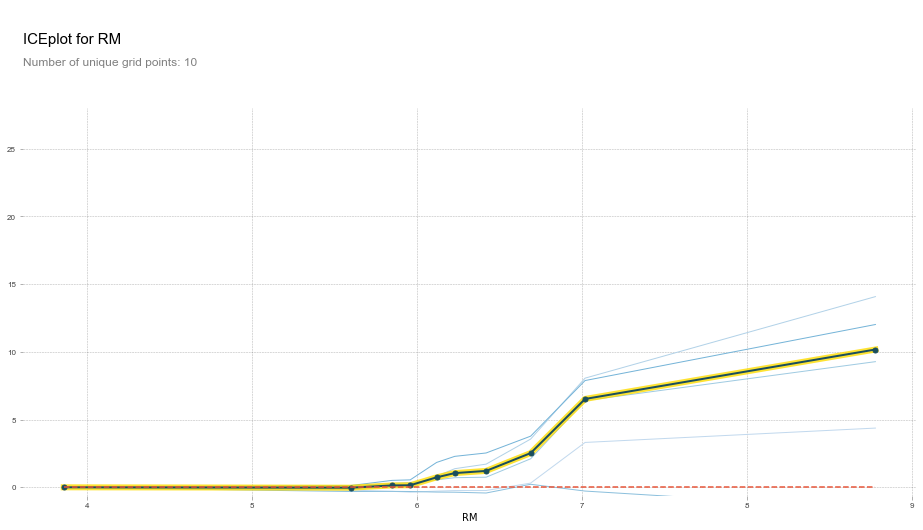

In [33]:
plot_pdp('RM',clusters=5)

TypeError: clabel() got an unexpected keyword argument 'contour_label_fontsize'

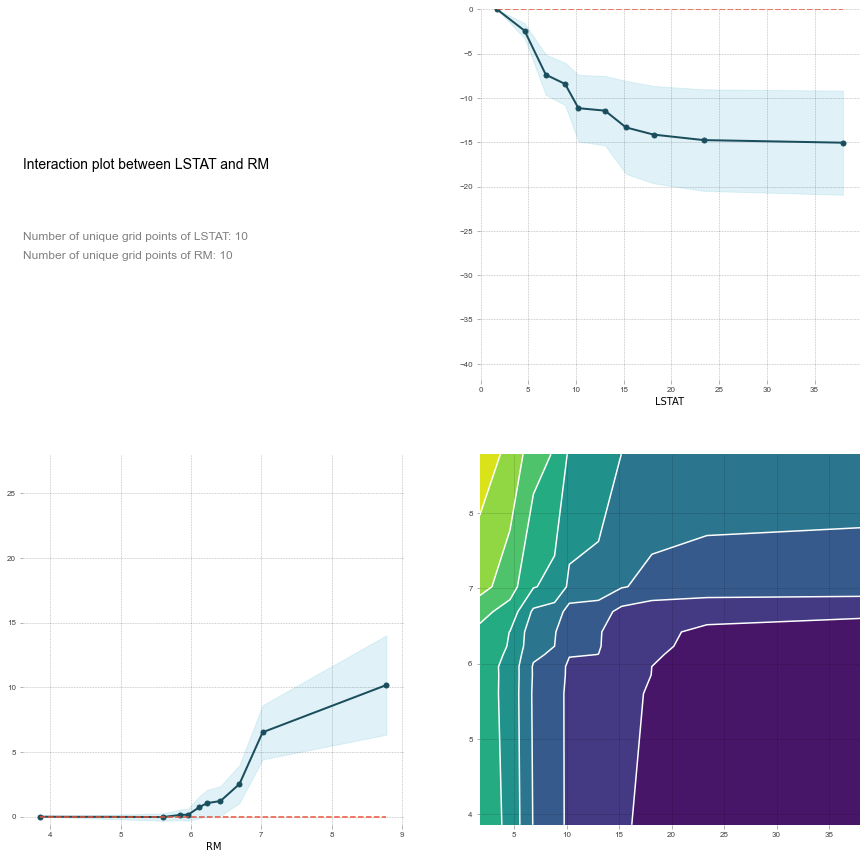

In [34]:
feats = ['LSTAT','RM']
p = pdp.pdp_interact(m,X_train,feats)
pdp.pdp_interact_plot(p,feats)

From the pdp plots above for RM and LSTAT against MEDV, we can safely conclude that both features are key drivers of the house prices (MEDV).

#### 6.2.7 Final Random Forest Model


In [54]:
df_sub = df_raw_train_keep.drop(['AGE','PTRATIO'],axis=1)
X_train,X_valid = split_vals(df_sub,n_train)
m = RandomForestRegressor(n_estimators=640,min_samples_leaf=1,max_features=0.5,n_jobs=-1,oob_score = True)
m.fit(X_train,y_train)
print_score(m)

[1.3017946632829858, 2.951040402266728, 0.9795988909585996, 0.8615247817170261, 0.8422271126763392]


In [ ]:
#X_test = df_raw_test_keep
X_test = df_raw_test_keep.drop(['DIS','PTRATIO'],axis=1)
prediction = m.predict(X_test)

In [ ]:
solution = pd.DataFrame({"ID": df_raw_test.ID, 'MEDV': prediction})
solution.to_csv('house_preds.csv', index=False)